In [1]:
#reference: https://susanqq.github.io/UTKFace/


In [32]:
import pandas as pd
import cv2
%matplotlib inline
from matplotlib import pyplot as plt
import pickle

In [33]:
import os
import numpy as np

In [34]:
loc="data/crop_part1/"

In [35]:
file_names=os.listdir(loc)

In [36]:
len(file_names)

9780

In [37]:
file_names.sort()

In [38]:
file_names[:10]

['100_1_0_20170110183726390.jpg.chip.jpg',
 '100_1_2_20170105174847679.jpg.chip.jpg',
 '101_1_2_20170105174739309.jpg.chip.jpg',
 '10_0_0_20161220222308131.jpg.chip.jpg',
 '10_0_0_20170103200329407.jpg.chip.jpg',
 '10_0_0_20170103200522151.jpg.chip.jpg',
 '10_0_0_20170103233459275.jpg.chip.jpg',
 '10_0_0_20170104013211746.jpg.chip.jpg',
 '10_0_0_20170110215927291.jpg.chip.jpg',
 '10_0_0_20170110220033115.jpg.chip.jpg']

In [39]:
# remove file names that do not contain age, gender, ethnicity - all
to_remove=[]
for fname in file_names:
    if len(fname.split("_"))!=4:
        to_remove.append(fname)
print("Number of files to remove = ",len(to_remove))        

Number of files to remove =  2


In [40]:
to_remove

['61_1_20170109142408075.jpg.chip.jpg', '61_3_20170109150557335.jpg.chip.jpg']

In [41]:
for rem_file in to_remove:
    file_names.remove(rem_file)

In [42]:
y_ages=[int(i.split("_")[0]) for i in file_names]

y_genders=[int(i.split("_")[1]) for i in file_names]
y_ethnicities=[int(i.split("_")[2]) for i in file_names]


In [43]:
im=cv2.imread(os.path.join(loc,file_names[0]))

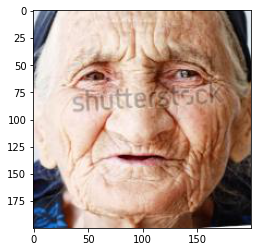

In [44]:
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))


In [45]:
im.shape

(200, 200, 3)

#### Save images after resizing and converting to grayscale

In [49]:
X_resized_grayed=[]
for f in file_names[:]:
    file_path=os.path.join(loc,f)
    img=cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    scale_percent = 50 # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    # resize image
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
#     print('Resized Dimensions : ',resized.shape)
#     plt.imshow(img)
    plt.show()
    X_resized_grayed.append(img)
 

In [50]:
X_resized_grayed=np.array(X_resized_grayed)
print(X_resized_grayed.shape)

(9778, 100, 100)


In [51]:
fname="pickles/X_grayed_resized"+str(scale_percent)+".p"
pickle.dump(X_resized_grayed, open( fname, "wb" ) )

#### Save images as they are

In [16]:
X=[cv2.imread(os.path.join(loc,f)) for f in file_names]

In [17]:
len(X)

9778

In [18]:
print(set(y_ages))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 96, 99, 100, 101, 110}


In [19]:
print(set(y_ethnicities))

{0, 1, 2, 3, 4}


In [20]:
print(set(y_genders))

{0, 1}


In [21]:
pickle.dump( y_ages, open( "pickles/y_ages.p", "wb" ) )
pickle.dump( y_ethnicities, open( "pickles/y_ethnicities.p", "wb" ) )
pickle.dump( y_genders, open( "pickles/y_genders.p", "wb" ) )

In [22]:
pickle.dump( X, open( "pickles/X.p", "wb" ) )